# Facial Expression, Age, Gender and Race Recognition Using Python

#### Data Science project; Open University of Israel; 

#### Student: Leeoriya Sapir,               ID: 205906217

## The goal of this project

The goal of this project, and actually the problem I want to solve, is to successfully predict and detect four intresting details from only a face image: the expression, age, gender and the race of the one's face behing the image. There are a lot of uses I can think of that this idea can help with, and about them you can read more in the "Motiviation" section below.

A good solution, as I expected to achive, will perform high accuracy of those four detials I'd like the model to figure out from the face images. Maybe at the beggining it won't be able to predict the exact age, for example- which makes me think from now on that to perform a better solution- I might divided the age detail to some age groups. 

## Motivation

In this section I'll desribe why this problem and it's solution are important to be figured, what are the uses of this kind of solution etc.

It is a well-known fact that human beings are responsible for the depiction of six basic emotions: happiness, anger, surprise, sadness, fear, and disgust. Creating a model that can accurately classify these emotions can be extremely useful in a variety of areas such as image processing, cybersecurity, robotics, psychological studies, virtual reality applications, etc.

The main objective of this capstone is to categorize faces based on the emotion shown in the expression into one of seven categories (the six basic emotions plus one category for neutral). Moreover, to detect the age, gender and race of the face in the image. 

The model developed will be able to predict the facial emotion, age, race and gender on pictures. The main example I can think of is the new exams software of the Open University which developed to "keep an eye" on the student- but a vitual one. In this kind of way, using this solution for example, the sofware can detect some important things: first of all, if the race, age and gender are equals to the real student- as described in his\ her student card. Moreover, the system can analyze the student facial expression- and give insights about it- so the university can learn about the difficulty of questions which known as more difficult at home exams than class ones, and even about giving some factor (extra point for extra hard exam).

Some more real-world examples for this application are:

* Determining client’s medical state, for online medical services
* In the case of autism,helping to interpret expressions
* During healthcare treatments, determining the patients feeling and comfort level
* In e-learning, adjusting the learning technique according to the style of learner
* In the case of driving, determining fatigue and alerting in advance
* Advertising purposes
* Detect potential clients in malls
* And more.... 

## Tools: Technologies and Algorithms

In order to train the model, I'll use neural networks for the calssification of the age, race and gender. (CNN).

To explore the creation of features of the emotion detection, I'll use unsupervised techniques: PCA and LBP.

About the libraries, I will mostly use them (part of them now in the first phase of the project, the rest in the second and final phase):

* For the CNN part, I will use the *fastai* library that sits on top of *PyTorch*.

* For the statistical modeling including classification, regression, clustering and dimensionality reduction- I will use *sklearn* library.

* For the statistical data visualization, plot etc. I will use *seaborn* library.

* Moreover, I'm gonna use some of the most known and helpful libraries of python, such of *numpy* for arrays, *pandas* for some more manipulation and analysis on the data, *matplotlib* for some more visualization and graphical plotting, *shitil* for dealing with the dataset files, and some more as described in the libraries section below.

## The Data

I will use 2 different datasets:
    
<b> For the age, race and gender classification: </b>


1. https://susanqq.github.io/UTKFace/ 
<br/>
This is a large scale face dataset (consists of 20k+ face images). I will use the "Aligned&Cropped Faces" set.



<b> And for the emotion detection, I will use the Kaggle Facial Expression Recognition chanllenge data set: </b>


2. https://www.kaggle.com/ashishpatel26/facial-expression-recognitionferchallenge

#### Import relevant libraries

In [3]:
#impoting relevant libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import shutil
import IPython
from PIL import Image
import time
import glob
from matplotlib.pyplot import imshow
import pickle

np.random.seed(42)

# Import fastai ext.

import fastai
from fastai.vision import * 
import fastai.vision as fav
from fastai.metrics import error_rate

# Import torch ext.

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch import optim
from torchvision import transforms
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets
from tqdm.autonotebook import tqdm

# Import sklearn ext.

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn import decomposition
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
# NOTE for myself due to v2 bugs
fastai.__version__

'1.0.61'

## Loading the 1st dataset- UTK (for Age, Gender, Race)

<B> First, I will start with the UTK dataset. Description of this data set: </B>
* Labels of the picture are the filename of the picture given in the format of age_gender_race_timestamp.jpg
* Age range: between 0 and 116 (integer, indicating the actual age of the person in the photo)
* Gender: Binary-  Male-->0; Female-->1
* Race: White-->0; Black-->1; Asian-->2; Indian-->3; Hispanic/Latino/MiddleEast-->4
* Date & Time: date& time the image was collected to this dataset, in format: yyyymmddHHMMSSFFF

In [64]:
# First, unzip from .zip file
shutil.unpack_archive("C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\DATA\\UTKface_Aligned&cropped-20210531T184028Z-001.zip", "C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\DATA\\clean")
os.chdir( "C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\DATA\\clean")

In [67]:
# Second, unzip from .tar.gz file
shutil.unpack_archive("C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\DATA\\clean\\UTKface_Aligned_cropped\\UTKFace.tar.gz", "C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\DATA\\clean\\UTKface_Aligned_cropped\\unzipped")
os.chdir( "C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\DATA\\clean\\UTKface_Aligned_cropped\\unzipped")

In [91]:
# Getting current working directory to get back to this directory easily
cwd=os.getcwd()
images_path='C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\DATA\\clean\\UTKface_Aligned_cropped\\unzipped\\UTKFace'

In [68]:
# Make sure I extracted it as well
path = "C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\DATA\\clean\\UTKface_Aligned_cropped\\unzipped\\UTKFace"
files = os.listdir(path)
size = len(files)

print("Example for a file name:", files[0])
print("Total samples:", size)

Example for a file name: 100_0_0_20170112213500903.jpg.chip.jpg
Total samples: 23708


In [92]:
 # Efficient way of getting my results, and calculate the time take to change the names

os.chdir(images_path)
start = time.time()
map(lambda filename: filename.split('.')[0]+'.jpg', os.listdir(images_path))
elapsed_time_fl = (time.time() - start)
print('Time take to change the names of all the files: ', elapsed_time_fl)
#os.listdir(images_path)

Time take to change the names of all the files:  0.07095193862915039


In [93]:
# Getting back to the original cwd
os.chdir(cwd)

<b> Understand the dataset </b>

The propose of the following functions is to explore the set of images that has been acquired and to take them as a dataframe to understand the distribution better

In [94]:
# This function is to return the key of the inputed value, since there are three different dictionaries that I created
# I chose to write a function which can easily give me the corresponding key 

def get_value(dictionary, this_key): 
    '''
    Gives the value of a inputed key
    dictionary: Dictionary from where the key has to be searched
    this_key: key for which value is required
    '''
    for key, value in dictionary.items(): 
         if this_key==key: 
            return value 
def get_key(dictionary, this_value): 
    '''
    Gives the key of a inputed value
    dictionary: Dictionary from where the key has to be searched
    this_value: value for which key is required
    '''
    for key, value in dictionary.items(): 
         if this_value == value: 
                return key
        

gender_dict={0:'Male', 1:'Female'}
gender_map = dict((g, i) for i, g in gender_dict.items())
race_dict={0: 'White', 1: 'Black', 2: 'Asian', 3: 'Indian', 4: 'Others'}
race_map=dict((r, i) for i, r in race_dict.items())
        

In [95]:
def parse_filepath(filepath):
    '''
    This function is to parse the filepath into three labels age, gender and race
    '''
    try:
        path, filename = os.path.split(filepath)
        filename, ext = os.path.splitext(filename)
        age, gender, race, _ = filename.split("_")
        return int(age), gender_dict[int(gender)], race_dict[int(race)]
    except Exception as e:
        print(filepath)
        return None, None, None

In [98]:
files = glob.glob(os.path.join(images_path, "*.jpg"))
attributes = list(map(parse_filepath, files))

C:\Users\USER\Desktop\LeeoriyaOpenU\DATA\clean\UTKface_Aligned_cropped\unzipped\UTKFace\39_1_20170116174525125.jpg.chip.jpg
C:\Users\USER\Desktop\LeeoriyaOpenU\DATA\clean\UTKface_Aligned_cropped\unzipped\UTKFace\61_1_20170109142408075.jpg.chip.jpg
C:\Users\USER\Desktop\LeeoriyaOpenU\DATA\clean\UTKface_Aligned_cropped\unzipped\UTKFace\61_1_20170109150557335.jpg.chip.jpg


*As we can see, we got 3 images with missing labels of race. So I changed them manually to:* 
* 39_1_20170116174525125.jpg --> 39_1_1_20170116174525125.jpg.chip.jpg
* 61_1_20170109142408075.jpg --> 61_1_1_20170109142408075.jpg.chip.jpg
* 61_1_20170109150557335.jpg --> 61_1_3_20170109150557335.jpg.chip.jpg

In [99]:
df = pd.DataFrame(attributes)
df['file'] = files
df.columns = ['age', 'gender', 'race', 'file']
df = df.dropna()
df.head()

,age,gender,race,file
0,100.0,Male,White,C:\Users\USER\Desktop\LeeoriyaOpenU\DATA\clean\UTKface_Aligned_cropped\unzipped\UTKFace\100_0_0_20170112213500903.jpg.chip.jpg
1,100.0,Male,White,C:\Users\USER\Desktop\LeeoriyaOpenU\DATA\clean\UTKface_Aligned_cropped\unzipped\UTKFace\100_0_0_20170112215240346.jpg.chip.jpg
2,100.0,Female,White,C:\Users\USER\Desktop\LeeoriyaOpenU\DATA\clean\UTKface_Aligned_cropped\unzipped\UTKFace\100_1_0_20170110183726390.jpg.chip.jpg
3,100.0,Female,White,C:\Users\USER\Desktop\LeeoriyaOpenU\DATA\clean\UTKface_Aligned_cropped\unzipped\UTKFace\100_1_0_20170112213001988.jpg.chip.jpg
4,100.0,Female,White,C:\Users\USER\Desktop\LeeoriyaOpenU\DATA\clean\UTKface_Aligned_cropped\unzipped\UTKFace\100_1_0_20170112213303693.jpg.chip.jpg


In [100]:
# The number of rows and columns 
df.shape

(23705, 4)

In [101]:
def label (plot):
    
    '''
    This function labels my count plots effectively
    '''
    for rect in plot.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
            # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

            # Create annotation
        plot.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                            # positive and negative values.
    plt.show()
sns.set(style="ticks", color_codes=True)   

<b> Now, lets understanding distribution using plots </b>

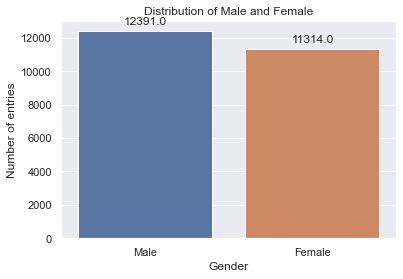

In [102]:
## Plot 1 --> Frequency of Gender

sns.set(rc={'figure.figsize':(6,4)})
plot = sns.countplot(x='gender', data = df)
plot.set_title('Distribution of Male and Female')
plot.set_xlabel('Gender')
plot.set_ylabel('Number of entries')
label(plot)

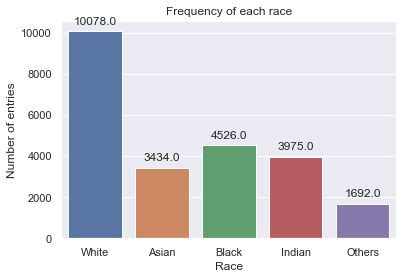

In [108]:
# Plot 2 --> Frequency of Races
sns.set(rc={'figure.figsize':(6,4)})
plot = sns.countplot(x='race', data = df)
plot.set_title('Frequency of each race')
plot.set_xlabel('Race')
plot.set_ylabel('Number of entries')
label(plot)

As we can see above, according to the race plot, most of our results may be biased to white- so I might not using this in the model, cause it might be an issue - the model might classify white people in a better accuracy than other races.

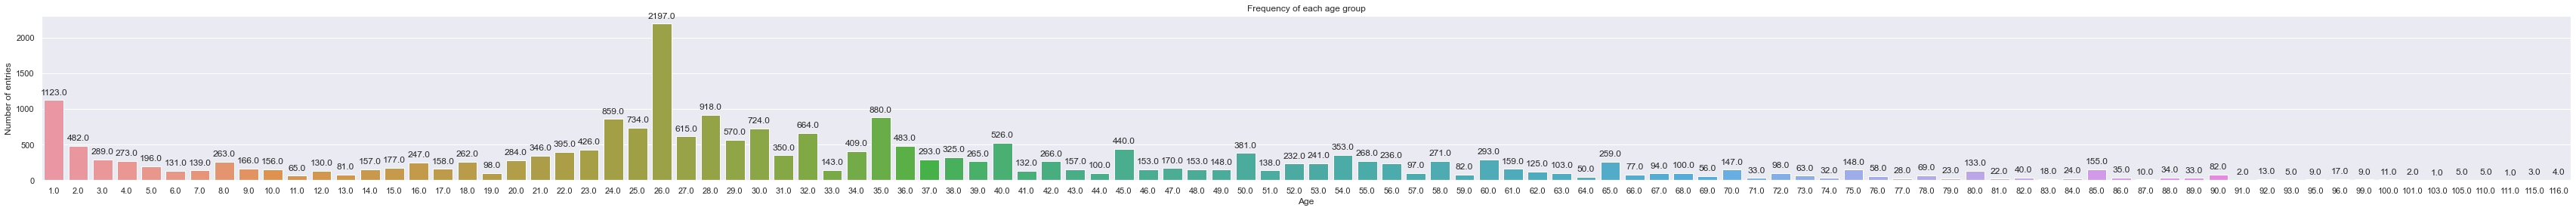

Max age: 116
Min age: 1


In [113]:
# Plot 3 --> Frequency of Ages
sns.set(rc={'figure.figsize':(60,4)})
plot = sns.countplot(x='age', data = df)
plot.set_title('Frequency of each age group')
plot.set_xlabel('Age')
plot.set_ylabel('Number of entries')
label(plot)
print("Max age: 116")
print("Min age: 1")

#### Classifiying Ages

<b>Due to the wide distribution, I decided to divide the files into age classes:</b>
    * 0 --> Ages 0-5
    * 1 --> Ages 6-10
    * 2 --> Ages 11-15
    * 3 --> Ages 16-20
    * 4 --> Ages 21-30
    * 5 --> Ages 31-40
    * 6 --> Ages 41-50
    * 7 --> Ages 51-60
    * 8 --> Ages 61-70
    * 9 --> Ages 70+

In [119]:
def age_label(age_value):
  
    #age_value: Age is taken as input to give a class from 0 - 9 according to the above cell
    
    if 0 <= age_value <= 5:
        age_value = 0
    elif 6 <= age_value <= 10:
        age_value = 1
    elif 11 <= age_value <= 15:
        age_value = 2
    elif 16 <= age_value <= 20:
        age_value = 3
    elif 21 <= age_value <= 30:
        age_value = 4
    elif 31 <= age_value <= 40:
        age_value = 5
    elif 41 <= age_value <= 50:
        age_value = 6
    elif 51 <= age_value <= 60:
        age_value = 7
    elif 61 <= age_value <= 70:
        age_value = 8
    else:
        age_value = 9
    return str(age_value)

<b> Now, to read the data, and divide it to train and test labels, I'll do the following: </b>

1.Listed all the filenames from the data folder

2.Randomised the images

3.Saved filenames into a text file

4.Saved labels into another text file spliting the data by '_'

5.Now, saved filenames into two different text files (train, test)

6.Saved filenames into two different text files (train_labels, test_labels)

In [120]:
# Function to write the contents to file
def writeToFile(contents, file):
    '''
    Writes contents of a given variable into the given filename
    contents: contents to be written into the file
    file: Name of the file that you would want to write the contents    
    '''
    with open(file, 'w') as f:
        for item in contents:
            f.write(item+'\n')

In [121]:
# function to split the label and store it in a file
def labelsToFile(labels, file):
    '''
    Writes contents of a given variable into the given filename
    contents: contents to be written into the file
    file: Name of the file that you would want to write the contents 
    '''
    with open(file, 'w') as f:
        for item in labels:
            temp_list=item.split('_')
            
            temp_list[0]=age_label(int(temp_list[0])) # New label for age
            # Ex: 25_1_3_xxxxx.jpg --> '413' is written [25 --> 4]
            f.write(temp_list[0]+temp_list[1]+temp_list[2]+'\n')

Now we got a multiclass-multioutput problem.
* To the Age criteria we have 10 labels (0-9)
* To the Gender criteria we have 2 labels (0/1)
* To the Race criteria we have 5 labels (0-4)
Which total its 100 outputs.

Here to eliminate multi-output problem and point it to a single target variable, we have taken new labelling from 0-99 and have given the new labelling the following way:
Permutaions from 000 - 914
Each class is replaced and given an integer in a sequence from 0 - 99
Ex: label-->'413', new_label--> 48,

In [122]:
# This code permutates and creates a new_dictionary with the old_lables as keys and new_labels as values
count=0
classes_dict={}
for i in range(10):
    for j in range(2):
        for k in range(5):
            #print(str(i)+str(j)+str(k)+':'+str(count))
            classes_dict.update({(str(i)+str(j)+str(k)+'\n'):count})
            count+=1

In [123]:
def final_labels(read_from, write_to):
    '''
    Reads label from a file and write new labels into another file
    read_from: File from which labels are to be read
    write_to: File to which the labels are to be written
    '''
    with open(read_from, 'r') as f:    
        with open(write_to, 'w') as f1:
            for line in f:
                f1.write(str(get_value(classes_dict, line))+'\n')

In [124]:
# All the dictionaries
age_dict={'0':'0-5', '1':'6-10', '2':'11-15', '3':'16-20', '4': '21-30', 
          '5':'31-40', '6':'41-50', '7':'51-60', '8':'61-70', '9': '70+'}
gender_dict={'0':'Male', '1':'Female'}
race_dict={'0':'White', '1':'Black', '2':'Asian', '3':'Indian', '4': 'Hispanic/Latino/Middle Eastern'}

Now, I'll divide 80% of the files to train, and the rest 20% to test:

In [125]:
# Processed followed, described above
filenames=os.listdir(images_path)
random.shuffle(filenames)
# Divided 80% of files to train, 20% to test
train=filenames[:int(len(filenames)*0.35)]
test=filenames[(int(len(filenames)*0.35)+1) : (int(len(filenames)*0.35)+int(len(filenames)*0.085))]
val=filenames[(int(len(filenames)*0.35)+int(len(filenames)*0.085))+1:(int(len(filenames)*0.35)+int(len(filenames)*0.085))+1001]

In [126]:
# Training image list and the Label list for each image
writeToFile(train, 'train_data.txt')
labelsToFile(train, 'train_labels.txt')

# Testing image list and the Label list for each image
writeToFile(test, 'test_data.txt')
labelsToFile(test, 'test_labels.txt')

# Validation image list and the label list for each image
final_labels('train_labels.txt', 'final_train.txt')
final_labels('test_labels.txt', 'final_test.txt')

<b> Now we have: </b> 
* Trainimages filesnames
* Trainimages labels
* Testimages filesnames
* Testimages labels

So now left to fo is to prepare our Datasets since this is some unique style of having label data and image data, we have to create a customized dataset. 
Most of the exist datasets in the web are already built, and her it was needed to creating a new customized dataset.

In [127]:
# Editing My DataLoader
class MyDataset(Dataset):
    
    def __init__(self, data_path, img_path, img_filename, label_filename, transform=None):
        
        '''
        data_path: path of the cwd, useful to get back to cwd
        image_path: path of images data folder
        image_filename: file containing filenames of images
        label_filename: file containing filenames of labels
        '''
        self.img_path = os.path.join(data_path, img_path)
        self.transform = transform
        self.train = train
        
        # reading img file from file
        img_filepath = os.path.join(data_path, img_filename)
        fp = open(img_filepath, 'r')
        self.img_filename = [x.strip() for x in fp]
        fp.close()
        # reading labels from file
        label_filepath = os.path.join(data_path, label_filename)
        fp = open(label_filepath, 'r')
        labels = [x.strip() for x in fp]
        labels= list(map(lambda el:int(el), labels))
        fp.close()
        self.label = labels

    def __getitem__(self, index):
        img = Image.open(os.path.join(self.img_path, self.img_filename[index]))
        img = img.convert('RGB')
        if self.transform is not None:
            img = self.transform(img)
      
        label=self.label[index]
        
        return img, label
    def __len__(self):
        return len(self.img_filename)

#### Loading Torch Datasets


In [128]:
# cwd
data_path=os.getcwd()
# image data folder location
image_path=images_path

train_images='train_data.txt'
train_labels='final_train.txt'

test_images='test_data.txt'
test_labels='final_test.txt'

# Total output labels
num_labels=100

# batch size
batch_size=32

In [129]:
# Specify transforms using torchvision.transforms as transforms
# library
train_transformations = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.RandomHorizontalFlip(128),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Test transformations does not need to have RandomHorizontal flip
test_transformations = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [130]:
# Loader
train_dataset=MyDataset(data_path, image_path, train_images, train_labels, transform=train_transformations)
test_dataset=MyDataset(data_path, image_path, test_images, test_labels, transform=test_transformations)

In [131]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size= 32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size= 32, shuffle=True)

####  Random data samples with labels

<ipython-input-132-3dfbefd648db>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])


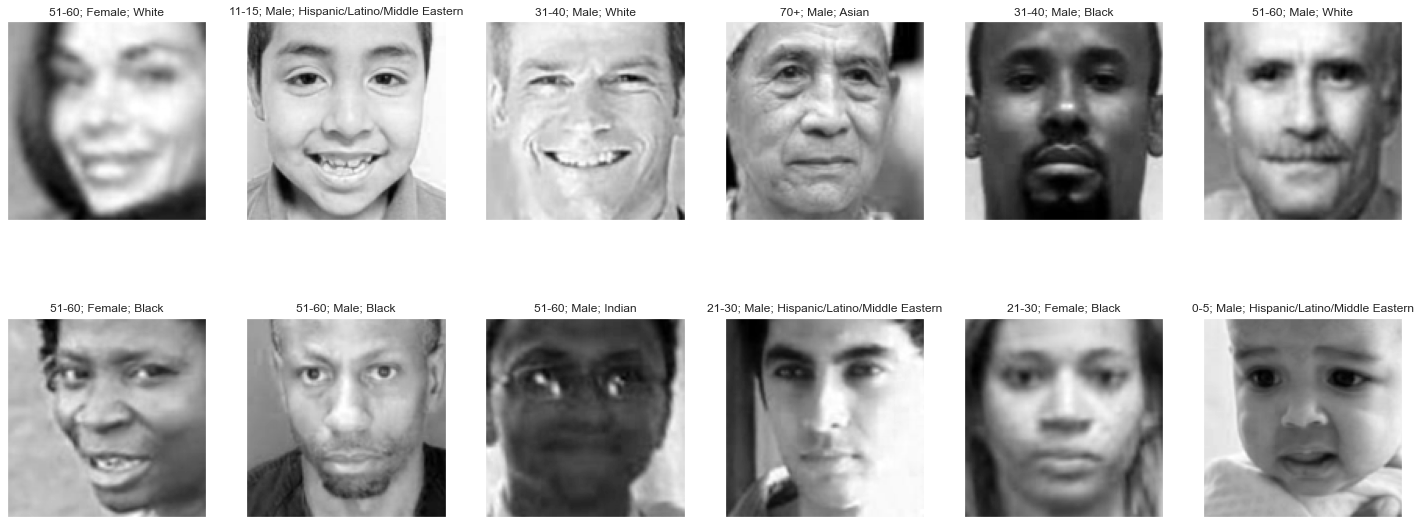

In [132]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 10))
plot_size=12
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx][0], cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    temp=list(get_key(classes_dict, int(labels[idx].item())))
    ax.set_title(get_value(age_dict, temp[0])+'; '+ get_value(gender_dict, temp[1])+'; '+ get_value(race_dict, temp[2]))

#### First results

In this section I will feed the dataset into a learner object using CNN as it seems as to be a classic easy model for image-classification problems, this with a pre-defined resnet34 model which fastai allows to use easily.

In [11]:
path = fav.Path('C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\DATA\\clean\\UTKface_Aligned_cropped\\unzipped\\UTKFace')
tfms = fav.get_transforms()
data_128 = (fav.ImageList.from_folder(path)
        .split_by_rand_pct(0.2, seed = 42)
        .label_from_func(extract_age_label)
        .transform(tfms, size = 128)
        .databunch(bs=256)
        .normalize(fastai.vision.imagenet_stats))

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\USER/.cache\torch\hub\checkpoints\resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-02
Min loss divided by 10: 1.45E-02


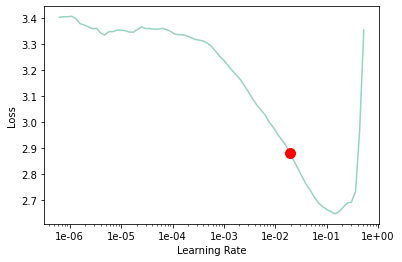

In [15]:
age_learner = fav.cnn_learner(data_128, fav.models.resnet34, metrics = [fav.error_rate , fav.accuracy])
age_learner.path = fav.Path('C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\modelsfas')
age_learner.lr_find()
age_learner.recorder.plot(suggestion = True)

As we can learn from the loss plot above,5e-2 seems to be the steepest but not the bottom yet and that's why I probably should pick it as our learning rate.
fastai provides the fit_one_cycle method- which I use in to start and train the model. Begin with 5 epochs =rounds of the model going over all of our data, pass it through the network, recalculate weights etc.

In [26]:
lr = 1e-1
age_learner.fit_one_cycle(5, slice(lr/2))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.005582,0.979362,0.419532,0.580468,15:04
1,1.059575,1.160192,0.458975,0.541025,15:33
2,1.033361,0.972209,0.418688,0.581312,16:26
3,0.976157,0.925387,0.399283,0.600717,16:09
4,0.917572,0.914277,0.396963,0.603037,15:15


So in the table above, we can see our accuracy result for the age criteria. 
The results are not that bad for first attempt- starting with 58% and improving to 60% over ther epochs.
Althought this is pretty nice result for the firsts apochs- I might be able to improve it, which we will see later in this project. 


## Loading the 2nd dataset- FER (for Emotions)

<B> Second, I will continue with the kaggle FER dataset, to detect people's emotions from their face images. </B>

As we will see later, it consists on a .csv file with the class (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral), the usage (training, validation or test set), and an array with the values of the pixels.

In [139]:
# import the .csv dataset
fer = pd.read_csv("C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\DATA\\FER\\fer2013.csv", delimiter=',') 
fer.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 1...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 154 153 164 173 178 185 185 189 187 186 193 194 185 183 186 180 173 166 161 147 133 172 151 114 161 161 146 131 104 95 132 163 123 119 129 140 120 151 149 149 153 137 115 129 166 170 181 164 143 157 156 169 179 185 183 186 186 184 190 191 184 186 190 183 175 168 160 147 136 135 167 136 108 153 167 149 137 111 90 134 162 121 122 141 137 151 151 156 143 116 124 159 164 174 169 135 144 155 153 164 170 176 178 177 178 187 185 181 182 183 181 178 170 164 158 148 144 130 136 173 130 97 137 167 157 138 113 90 138 168 109 123 146 151 152 155 127 113 159 ...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38 39 74 138 161 164 179 190 201 210 216 220 224 222 218 216 213 217 220 220 218 217 212 174 160 162 160 139 135 137 131 94 56 36 44 27 16 229 175 148 173 154 151 171 172 183 101 23 25 67 127 164 170 171 182 199 212 219 220 224 226 226 226 226 226 227 227 228 225 221 217 202 174 158 155 145 126 126 129 99 70 37 27 35 27 214 156 157 168 153 172 168 175 100 16 8 47 117 169 175 175 183 194 204 214 218 223 225 227 228 226 229 231 232 232 229 227 225 224 217 198 174 154 134 110 97 115 96 69 52 28 22 28 202 153 166 156 164 166 170 116 26 2 21 90 165 18...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 19 43 52 13 26 40 59 65 12 20 63 99 98 98 111 75 62 41 73 118 140 192 186 187 188 190 190 187 182 176 173 172 173 25 34 29 35 29 26 20 23 19 31 22 21 20 31 26 17 34 75 37 18 38 80 85 25 38 26 34 97 94 76 86 95 70 39 98 129 185 188 188 189 190 190 188 182 176 173 172 173 26 29 25 35 25 30 20 21 16 28 34 26 15 17 19 22 29 62 64 47 45 76 76 78 65 82 12 14 56 56 72 74 66 65 86 129 172 190 187 189 190 190 187 182 177 172 172 174 26 33 32 31 25 33 26 21 16 16 37 27 14 15 12 17 31 38 40 58 73 59 35 82 68 72 43 22 33 52 51 66 71 57 71 121 160 191 188 18...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84 115 127 137 142 151 156 155 149 153 152 157 160 162 159 145 121 83 58 48 38 21 17 7 5 25 27 24 25 1 0 0 0 0 0 0 0 0 0 0 6 18 26 37 50 62 83 115 134 138 144 147 150 162 163 164 161 165 169 171 176 175 177 169 147 110 79 64 42 23 13 9 2 16 26 23 26 0 0 0 0 0 0 0 0 0 1 6 18 29 49 73 93 116 129 138 143 148 153 158 158 162 168 170 169 170 176 181 185 186 183 180 167 143 109 81 54 29 11 8 3 10 27 26 26 0 0 0 0 0 0 0 0 0 8 32 55 74 94 108 121 127 132 138 145 154 159 160 162 166 170 174 173 177 181 183 183 186 188 188 180 164 138 113 69 36 14 4 3 11 2...,Training


In [140]:
# count the training and test sets
fer["Usage"].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [142]:
emotion_label_to_text = {
    0:'anger',
    1:'disgust',
    2:'fear',
    3:'happiness',
    4: 'sadness',
    5: 'surprise',
    6: 'neutral'}
emotion_counts = fer['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'amount']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_label_to_text)
emotion_counts

,emotion,amount
0,anger,4953
1,disgust,547
2,fear,5121
3,happiness,8989
4,sadness,6077
5,surprise,4002
6,neutral,6198


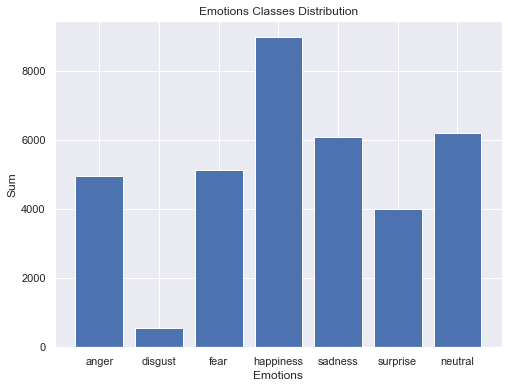

In [157]:
plt.figure(figsize=(8, 6))
plt.bar(emotion_counts.emotion, emotion_counts.amount)
plt.title('Emotions Classes Distribution')
plt.xlabel('Emotions')
plt.ylabel('Sum')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


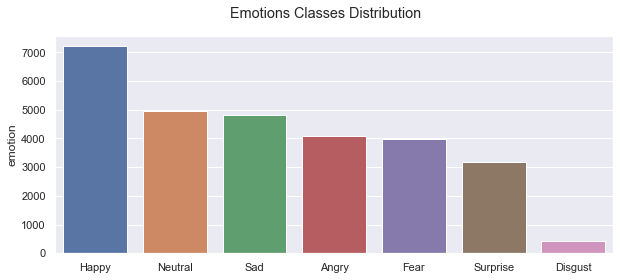

In [177]:
#Lets organize it better 
plt.figure(figsize=(10,4))
labels = ['Happy', 'Neutral', 'Sad', 'Angry', 'Fear','Surprise', 'Disgust']
plt.suptitle('Emotions Classes Distribution')
sns.barplot(labels, fer[fer['Usage'] == 'Training'].emotion.value_counts())
plt.show()

As we can see above, the biggest emotion amount is "happiness".  All of the other emotions are presented as well- about 4000-6000 of each, except the "disgust" emotion which barely have examples. Because of that, I might try and dispose some of the labels later on.

Now, it's time to combine both of the test sets- the private one and the public one.
As described in Kaggle- the FER2013 dataset contains three usages - each image is used for either "Training", "PublicTest", or "PrivateTest".
There are 2 test usages exist because the fact this dataset was used in a kaggle competition, in order to avoid overfitting. 

Lets look at the distribution of emotion-classes between our train and validation sets and make sure they are similar:


In [165]:
train_df = fer[fer['Usage'] == 'Training']
valid_df = fer[fer['Usage'] != 'Training']

In [166]:
valid_df['emotion'].value_counts(normalize=True) * 100

3    24.714405
4    17.372527
6    17.177487
2    14.265812
0    13.346336
5    11.577041
1     1.546392
Name: emotion, dtype: float64

In [167]:
train_df['emotion'].value_counts(normalize=True) * 100

3    25.131492
6    17.294228
4    16.823992
2    14.270786
0    13.915497
5    11.045317
1     1.518688
Name: emotion, dtype: float64

So, as I wanted to make sure- the percentages of each emotion class in our training set is very similar to our validation set.

In [22]:
# Indicate the paths for the two datasets (.csv and images)
path = 'C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\DATA\\images_fer2013\\Training'
path2 = 'C:\\Users\\USER\\Desktop\\LeeoriyaOpenU\\DATA\\FER\\fer2013.csv'
wd = '\kaggle\working' # Create a working directory to save files created

# Create ImageDataBunch (from fastai library)  
bs=128
np.random.seed(42)
tfms = get_transforms(max_rotate=20, max_zoom=1.1, max_lighting=0.4, max_warp=0.2, p_affine=1., p_lighting=1.1) #no transforms in valid set                      
data = ImageDataBunch.from_folder(path, train='.', valid_pct=.2, 
                                  test='../PrivateTest/', 
                                  ds_tfms=tfms, bs=bs)
data.normalize(imagenet_stats)

print(f'Number of images:\nTraining: {len(data.train_ds)}, Validation: {len(data.valid_ds)}, Test {len(data.test_ds)}')

Number of images:
Training: 22968, Validation: 5741, Test 3589


In [23]:
classes = data.classes
print(classes)

['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']


####  Random data samples with labels

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x000002E23C8AF790>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\torch\utils\data\dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "C:\ProgramData\Anaconda3\lib\site-packages\torch\utils\data\dataloader.py", line 1291, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


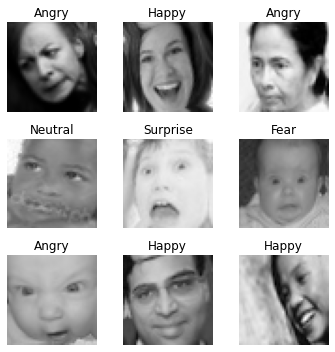

In [24]:
data.show_batch(rows=3, figsize=(5,5))

#### First results

Here, as I did before in the first data set, I will feed the dataset into a learner object using CNN as it seems as to be a classic easy model for image-classification problems, this with a pre-defined resnet34 model which fastai allows to use easily.
Also here I will begin with 5 epochs.

In [25]:
emotions_learner = fav.cnn_learner(data, fav.models.resnet34, metrics = [fav.accuracy, fav.error_rate])
emotions_learner.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.369769,1.855838,0.317540,0.682459,04:52
1,1.817671,1.693733,0.346630,0.653370,04:17
2,1.722584,1.624867,0.365790,0.634210,04:21
3,1.659677,1.569743,0.390698,0.609302,04:18
4,1.610816,1.557966,0.395750,0.604250,04:17


So in the table above, we can see our accuracy result for the emotion sets.
This time, the results can be a little bit disappointing- starting with 31.7%, but there is a silver lining- we an see a nice improvement over the epochs, almost 8% increase of accuracy, ending with 39.5%.

The results are not that bad for first attempt- but I might be able to improve it, which we will see later in this project. 

## Thoughts

So in this part of the project, which I also call phase1, I:
* Described the problem, the desired solution- and the great meaning of both
* Collecting and analyzing the primary part of the data sets
* Search and find which libraries I would probably use for this project
* Use and run algorithms on the datasets
* First attempt to analyze the first results we've got from the data and especially its accuracy
* And more that I might didnt mentioned here but can be found here.

Following in this project, I will try to  improve the accuracy of all the data sets and get better result by run some more epochs and more machine- learning algorithms.

Moreover, I will probably need to clean the data sets more to achieve my goal.

At the end of the project my will is to get to highest accuracy and test the model on data that I will collect by myself and will know it's actual details. 
